# Visualizing Time Series Data in Python

<br>

<h2>Summary Statistics & Diagnostics</h2>

<h3>Plot aggregates of the data</h3>     
<br>

In [155]:
co2_df = pd.read_csv( 'datasets/co2_levels.csv', parse_dates= [0], index_col= 0 )
print( co2_df )

              co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
...           ...
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[2284 rows x 1 columns]


In [156]:
# aggreagting by week and months
co2_WeekAvg_df = co2_df.groupby( by= co2_df.index.week ).mean()
co2_MonthAvg_df = co2_df.groupby( by= co2_df.index.month ).mean()

c:\python-projects\machine-learning\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


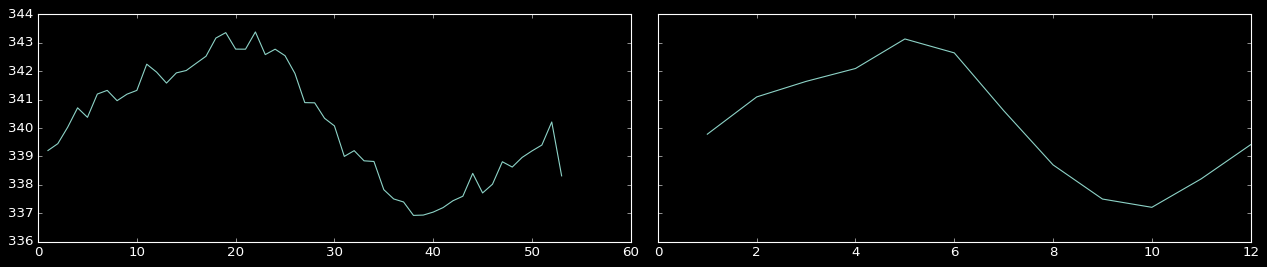

In [157]:
fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (16,3.5), sharey= True )

ax1.plot( co2_WeekAvg_df );     ax2.plot( co2_MonthAvg_df )
plt.tight_layout()

<h3>Plot Summary statsitical plots of the data</h3>     

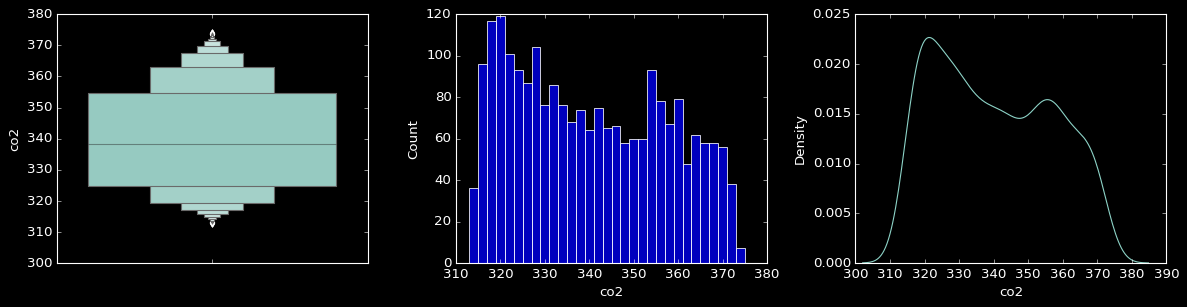

In [158]:
fg,(ax1,ax2,ax3) = plt.subplots( 1,3, figsize= (15,4) )

sns.boxenplot( y= co2_df['co2'], ax= ax1, )
sns.histplot( x= co2_df['co2'], ax= ax2,binwidth= 2  )
sns.kdeplot( x= co2_df['co2'], ax= ax3 )

plt.tight_layout()

<br>

<h2>TimeSeries Decomposition: Seasonality, Trend & Noise</h2>

<h3>Decompose</h3>     
<br>

In [159]:
from statsmodels.tsa import seasonal
from pylab import rcParams
rcParams['figure.figsize'] = 18,9

In [160]:
# freq and fillna
co2_df = co2_df.asfreq( freq= pd.infer_freq(co2_df.index) )
co2_df = co2_df.fillna( method= 'bfill' )

In [161]:
# Decompose

co2_decomp_obj = seasonal.seasonal_decompose( co2_df['co2'] )

# OR Seasonal-Trend Decomposition using LOESS (STL)
co2_decomp_LOESS_obj = seasonal.STL( co2_df['co2'] ).fit()

seasonal_Ser, trend_Ser, resid_Ser = co2_decomp_obj.seasonal, co2_decomp_obj.trend, co2_decomp_obj.resid

#### plot decomposed elements directly

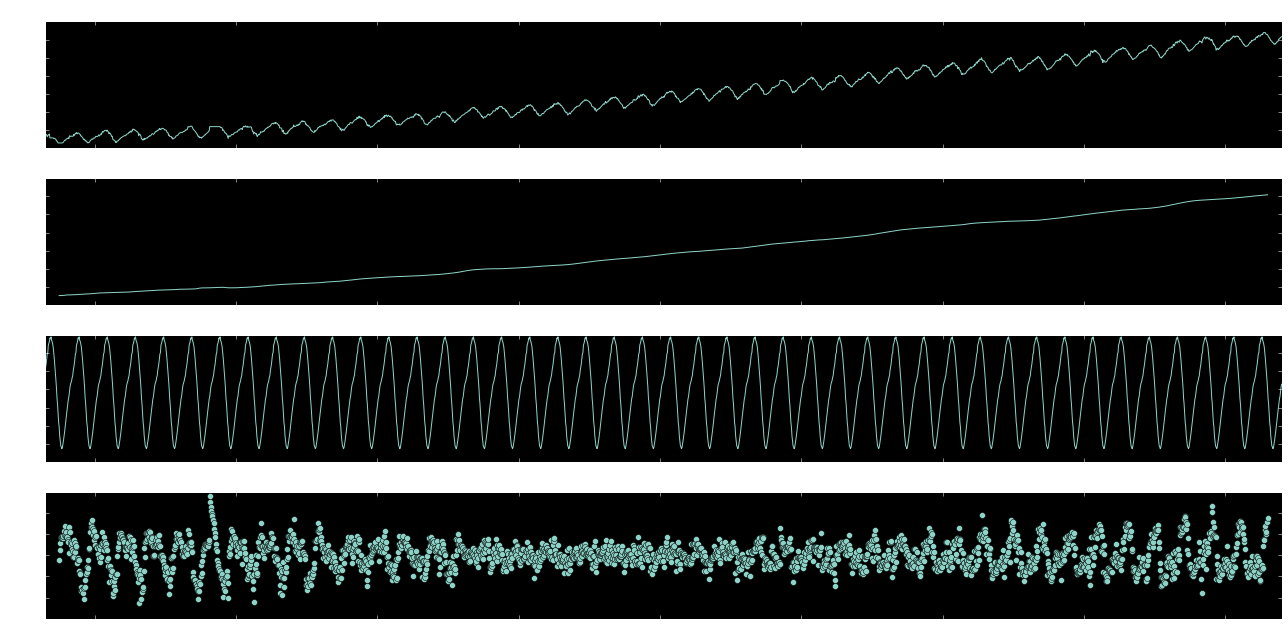

In [166]:
rcParams['figure.figsize'] = 18,9
co2_decomp_obj.plot( ); plt.show()

In [168]:
# decomp_obj's methods
print( dir( co2_decomp_obj )[:-1] )

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_observed', '_resid', '_seasonal', '_trend', '_weights', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend']


<br>

<h3>Plotting the decomposed parts</h3>
<br>

In [169]:
# little modification (for aesthetic)

seasonal_MonthlyResample_Ser =  seasonal_Ser.resample( 'M' ).mean()
seasonal_MonthlyResample_Ser = seasonal_MonthlyResample_Ser[1:]

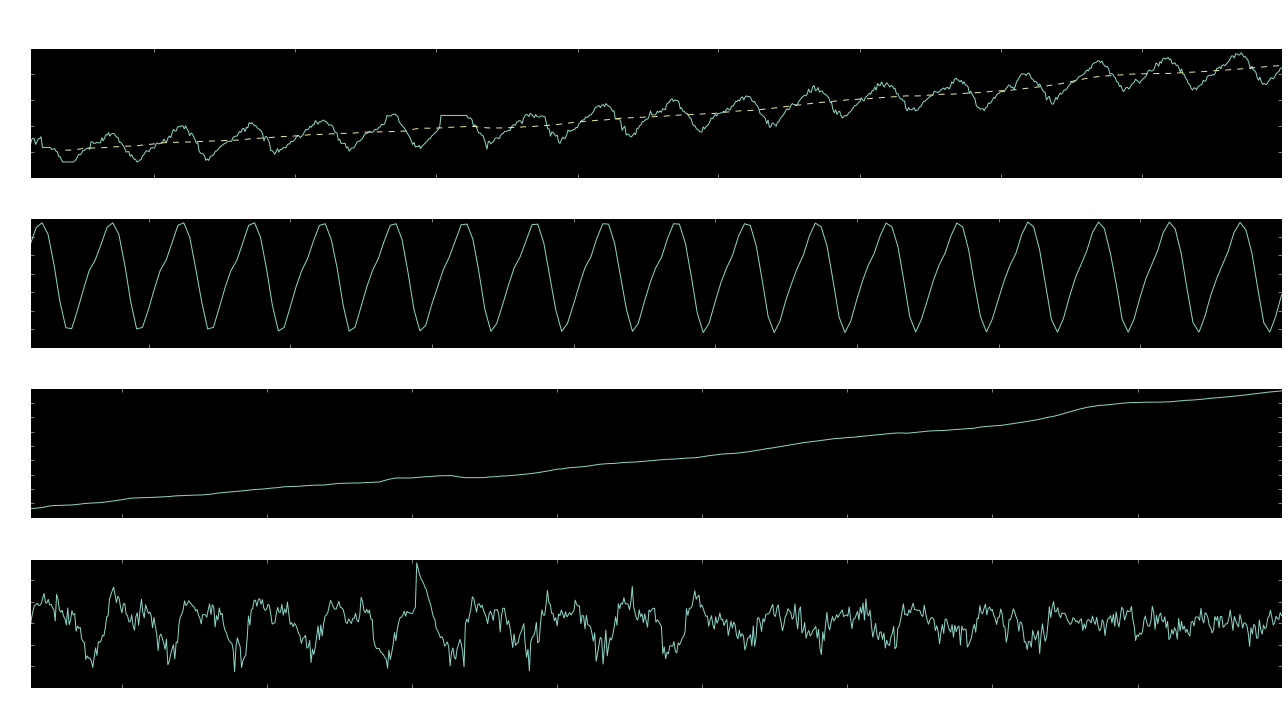

In [170]:
## plots

dataToPlot_ls = [ co2_df['co2'][:'1975'], seasonal_MonthlyResample_Ser[:'1975'], trend_Ser[:'1975'], resid_Ser[:'1975'] ]
title_ls= [ 'Original Timeseries', 'Seasonal decomposition', 'Trend decomposition', 'Residual decomposition' ]

row_num = len( dataToPlot_ls )

fg,ax = plt.subplots( nrows= row_num, ncols= 1, figsize= (18,2.5*row_num) )

for idx,(e_ax,e_data,e_title) in enumerate(  zip(ax.flatten(),dataToPlot_ls, title_ls)  ):
    e_ax.plot( e_data )
    e_ax.set_title( e_title, fontsize= 14 )

ax[0].plot( dataToPlot_ls[2], linestyle= '--', alpha= 0.9 )    
fg.suptitle( 'Seasonal-Trend Decomposition', fontsize= 17 )   

plt.tight_layout()

#### `Residual = Original Series - ( Trend + Seasonal ) `

In [171]:
my_resid = co2_df['co2'] - ( co2_decomp_obj.trend + co2_decomp_obj.seasonal )

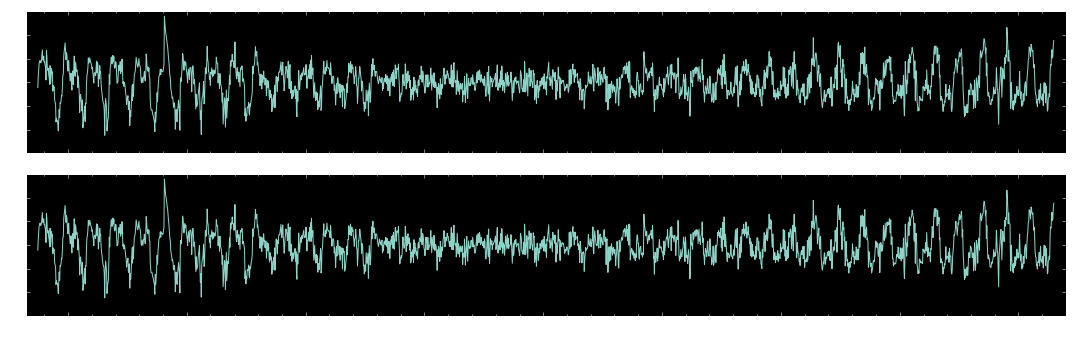

In [172]:
fg,(ax1,ax2) = plt.subplots( 2,1, figsize= (15,5), sharex= True )
my_resid.plot( ax= ax1 )   ;         co2_decomp_obj.resid.plot( ax= ax2 )
plt.tight_layout(); plt.show()

#### `kde` plots

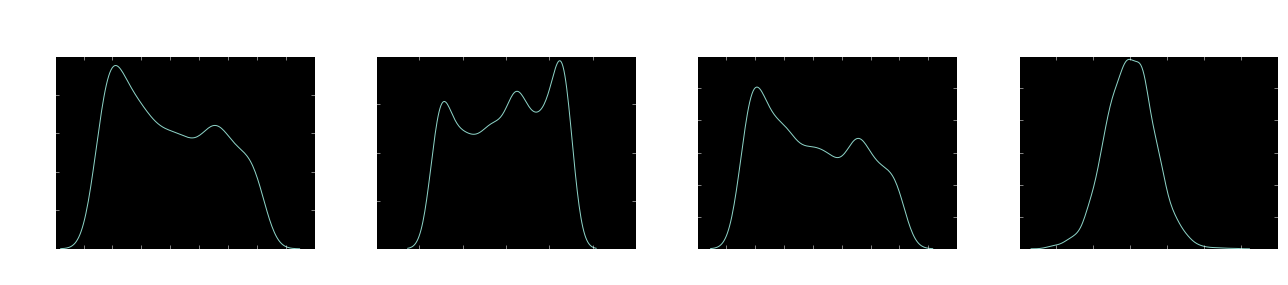

In [174]:
dataToPlot_ls = [ co2_df['co2'], seasonal_Ser, trend_Ser, resid_Ser ]
title_ls= [ 'Original Timeseries', 'Seasonal decomposition', 'Trend decomposition', 'Residual decomposition' ]

col_num = len( dataToPlot_ls )

fg,ax = plt.subplots( nrows= 1, ncols= col_num, figsize= (18,4) )

for idx,(e_ax,e_data,e_title) in enumerate(  zip(ax.flatten(),dataToPlot_ls, title_ls)  ):
    sns.kdeplot( x= e_data, ax= e_ax )
    e_ax.set_title( e_title, fontsize= 14 )

fg.suptitle( 'Seasonal-Trend Decomposition', fontsize= 17 )   
plt.tight_layout(); plt.show()

<br>

<h2>Multiple Time Series</h2>
<br>

In [175]:
meat_df = pd.read_csv( 'datasets/meat_produce.csv', parse_dates= [0], index_col= 0 )
meat_df

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2012-10-01,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9
2012-11-01,2206.6,10.1,2078.7,12.4,3006.7,37.5,515.3


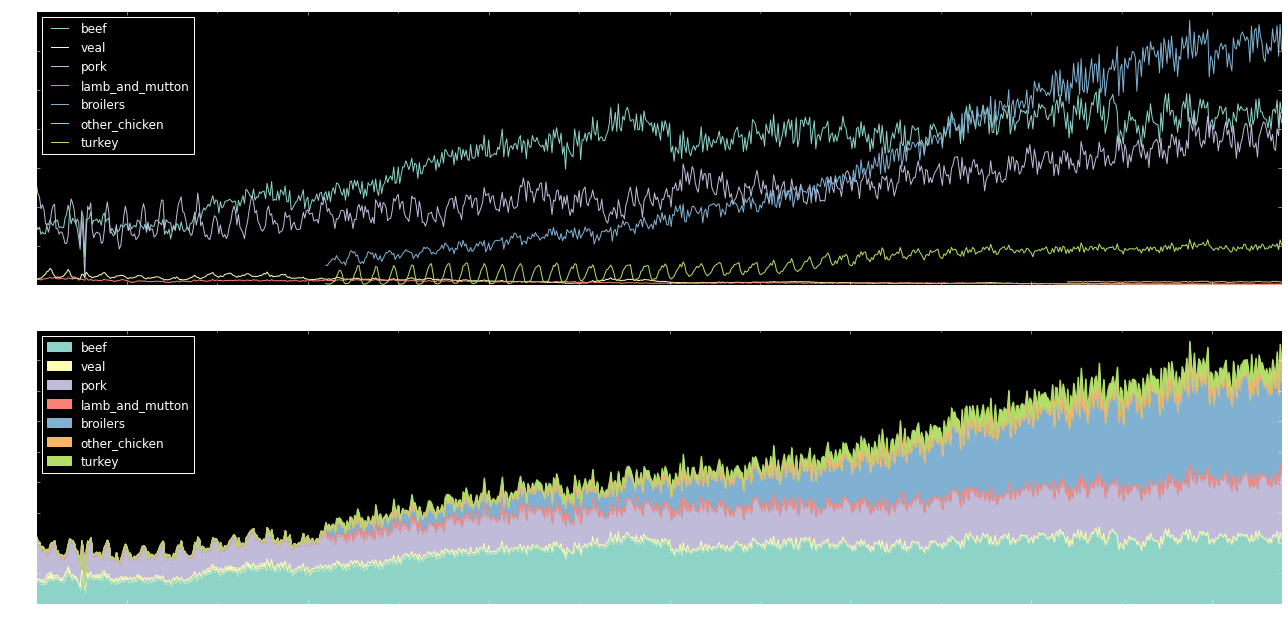

In [176]:
fg,(ax1,ax2) = plt.subplots( 2,1, figsize= (18,2*4.5) )

meat_df.plot( ax= ax1 );     meat_df.plot.area( ax= ax2 )

plt.tight_layout()

<br>

<h3>Plot multiple time series</h3>     

[Matplotlib Color reference](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)

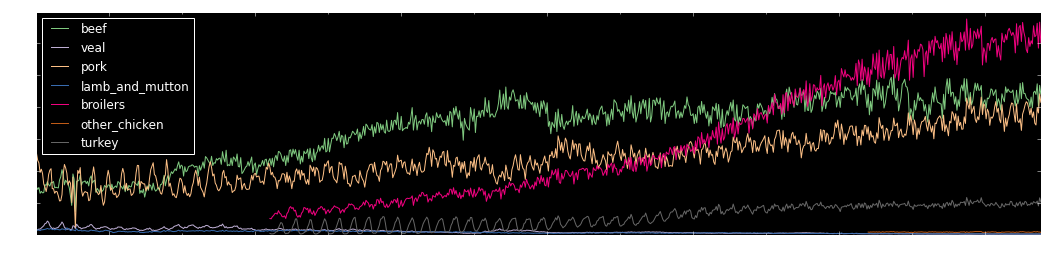

In [177]:
fg, ax = plt.subplots( figsize= (18,4) )

meat_df = pd.read_csv( 'datasets/meat_produce.csv', parse_dates= [0], index_col= 0 )
meat_df.plot( ax= ax, colormap='Accent' ) #<-- colormap

plt.show()

#### Plot stats table with the plot

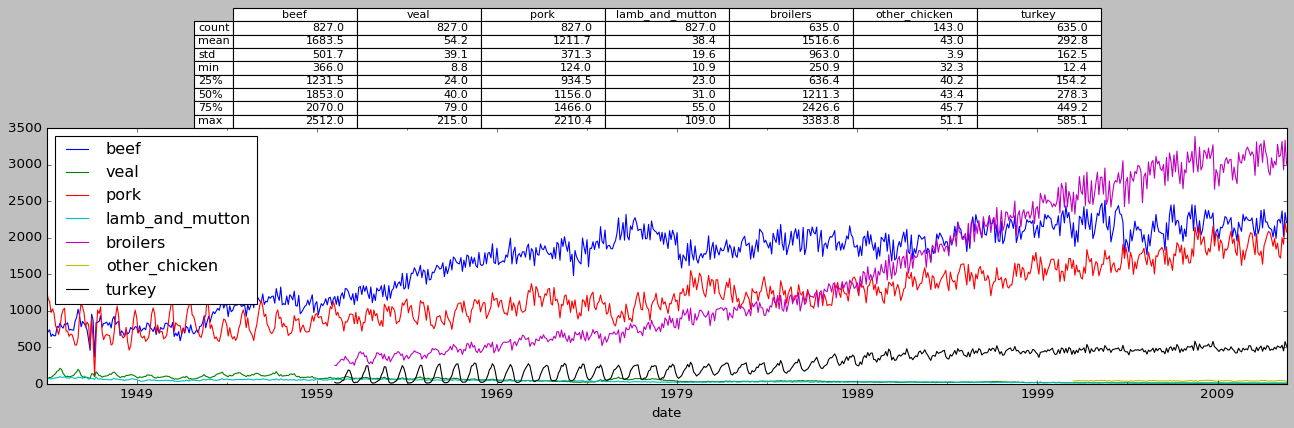

In [182]:
plt.style.use('classic')

fg, ax = plt.subplots( figsize= (20,4) )

meat_df.plot( ax= ax )

summary = meat_df.describe()

ax.table( cellText= np.round(summary.values,1), colWidths= [0.1]*len(meat_df.columns), 
          rowLabels= summary.index, colLabels= summary.columns, loc= 'top' )

plt.show(); plt.style.use('dark_background')

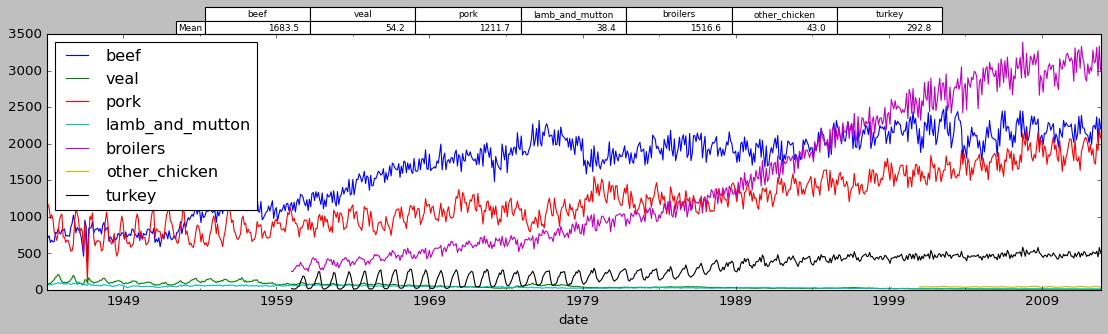

In [183]:
plt.style.use('classic')

fg, ax = plt.subplots( figsize= (17,4) )

meat_df.plot( ax= ax )

summary = pd.DataFrame( meat_df.mean() ).T

ax.table( cellText= np.round(summary.values,1), 
          colWidths= [0.1]*len(summary.columns), colLabels= summary.columns, rowLabels= ['Mean'], loc= 'top' )

plt.show(); plt.style.use('dark_background')

#### Subplots for dataframe

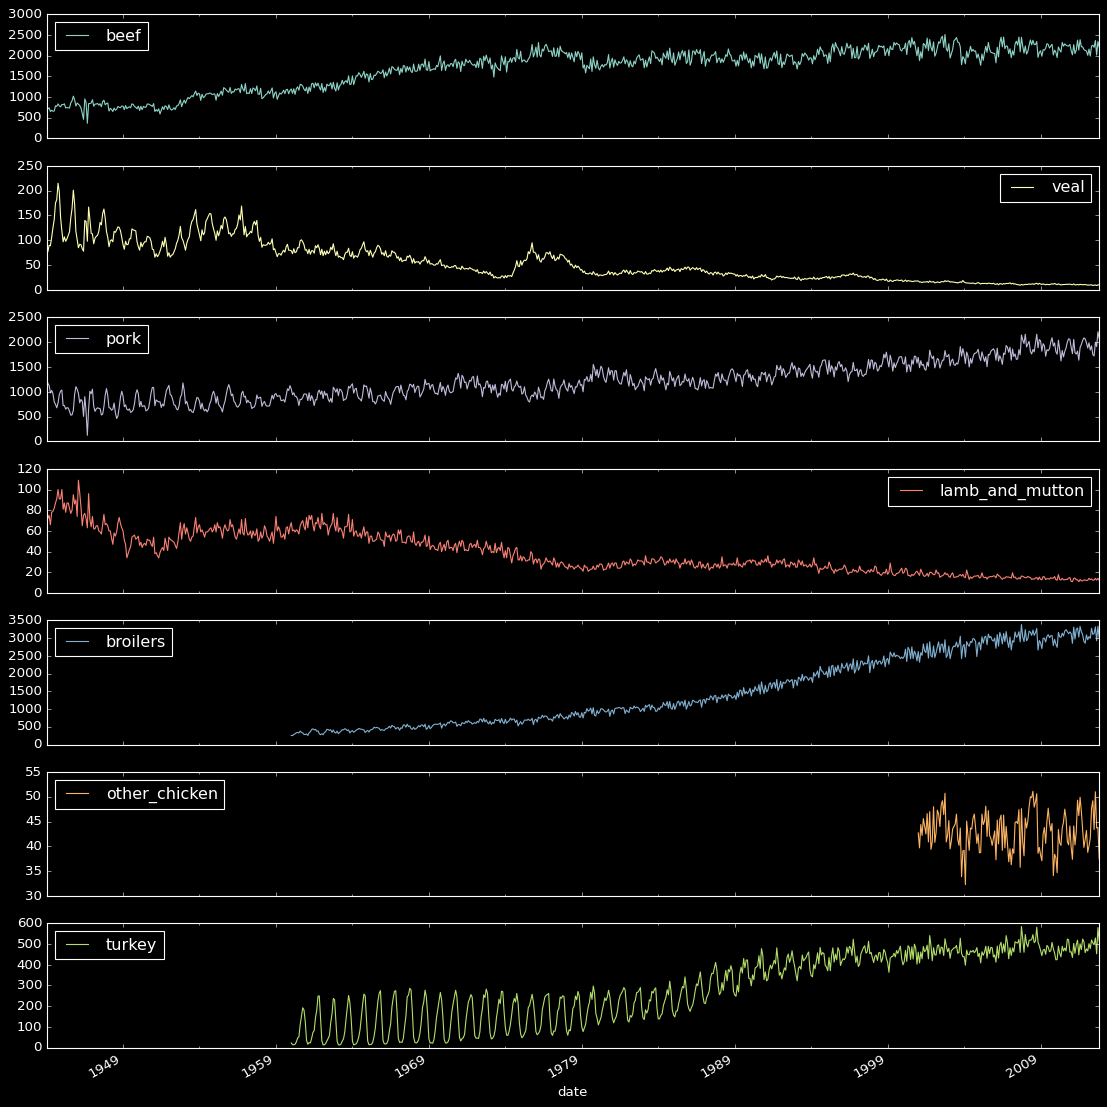

In [184]:
meat_df.plot( subplots= True, figsize= (14,7*2) )
plt.tight_layout(); plt.show()

#### Subplot with more customization

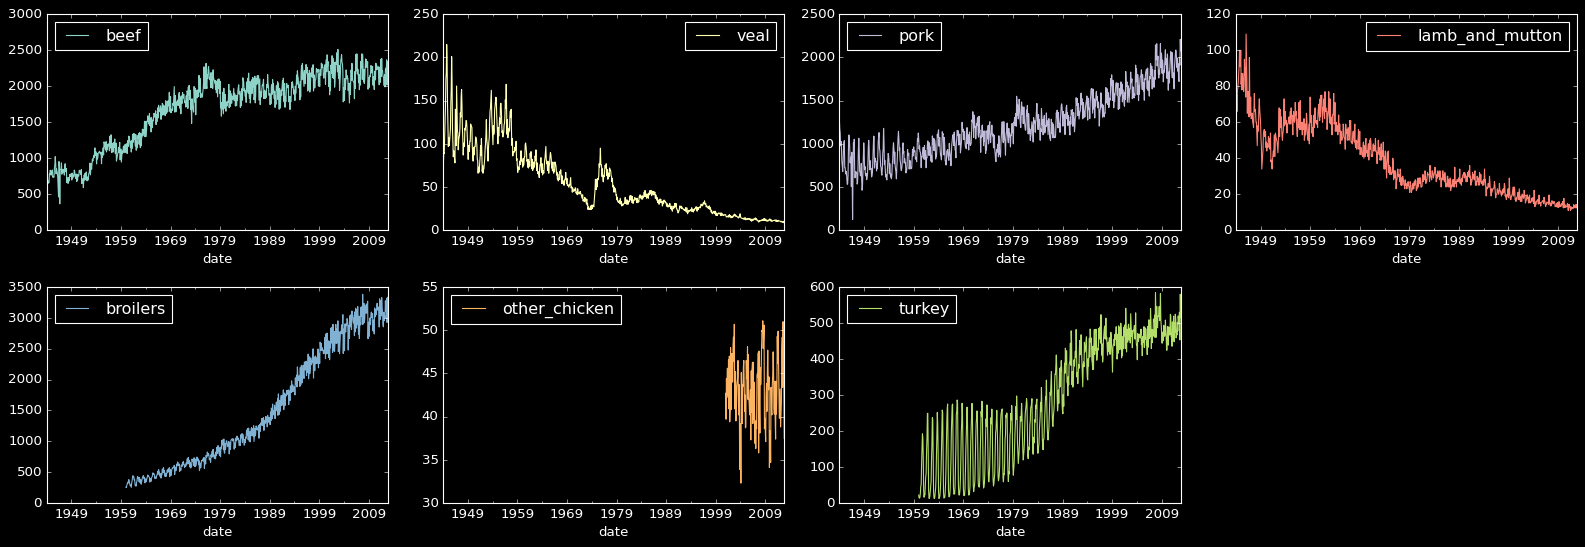

In [185]:
meat_df.plot( subplots= True, figsize= (20,7*1), layout= (2,4), sharex= False, 
              linewidth= 1 )

plt.tight_layout()

<br>
<h3>Explore relationships between multiple time series: Correlation & Clustering Plots</h3>     
<br>

#### Correlation Matrix plot

In [186]:
pd.options.display.max_rows = 7

meat_corrMtrx = np.round( meat_df.corr( method= 'spearman' ), 2)
meat_corrMtrx

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
beef,1.00,-0.81,0.83,-0.84,0.81,0.72,0.78
veal,-0.81,1.00,-0.91,0.91,-0.93,0.08,-0.83
pork,0.83,-0.91,1.00,-0.84,0.92,0.05,0.86
lamb_and_mutton,-0.84,0.91,-0.84,1.00,-0.92,0.10,-0.82
broilers,0.81,-0.93,0.92,-0.92,1.00,0.52,0.91
other_chicken,0.72,0.08,0.05,0.10,0.52,1.00,0.56
turkey,0.78,-0.83,0.86,-0.82,0.91,0.56,1.00


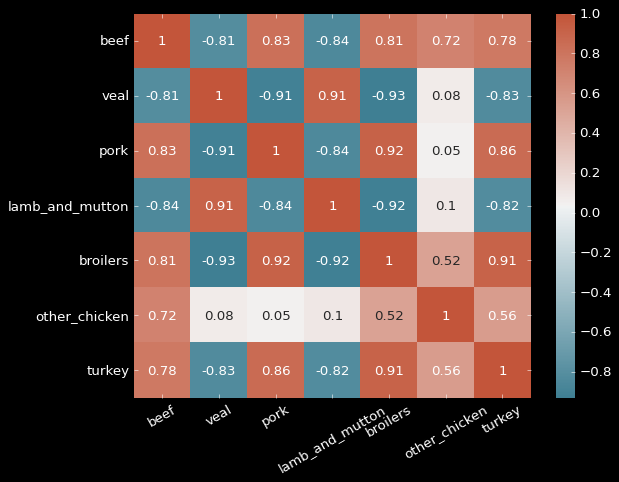

In [187]:
sns.heatmap( data= meat_corrMtrx, annot= True,  fmt= '.2g', cmap= sns.diverging_palette(220, 20, as_cmap=True, center= 'light' )  )
plt.xticks( rotation= 30 )
plt.show()

#### Clustered heatmaps

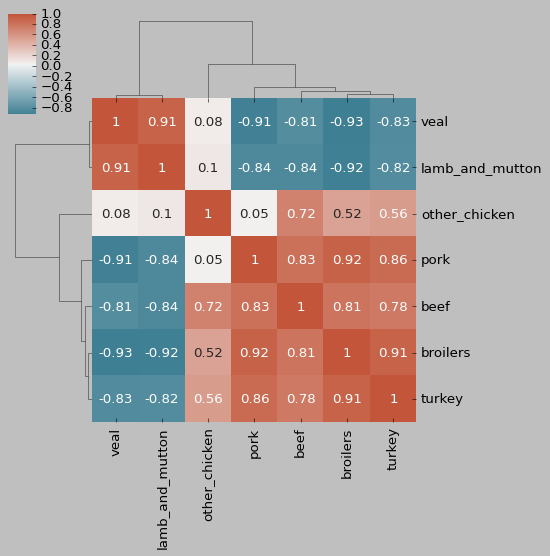

In [189]:
plt.style.use( 'classic' )

sns.clustermap(  data= meat_corrMtrx,figsize= (7,7),
                 row_cluster= True, col_cluster= True, annot= meat_corrMtrx,
                 cmap= sns.diverging_palette(220, 20, as_cmap=True, center= 'light' )  )
plt.show()

### Libraries

In [3]:
# %reset
# import utility_madhur



#   &thinsp;   &nbsp;   &ensp;   &emsp;

#  import warnings; warnings.filterwarnings( action= 'ignore' )

# # to check whether a string is a python keyword
# import keyword
# keyword.iskeyword('str')

from IPython.core.display import display, HTML
display(  HTML( '<style>.container { width:100% !important; }</style>' )  )

import warnings
get_ipython().run_line_magic('config', 'Completer.use_jedi = False')
import os, random, time

import pandas as pd
# import pandas_datareader as pdr
import numpy as np,  seaborn as sns
from numpy import savetxt
from numpy import genfromtxt
import sklearn
import missingno as msno
import h5py, math, scipy, statsmodels
# import xlrd
import ipywidgets as widgets

import datetime, dateutil
from datetime import timedelta


# import fuzzywuzzy
# from fuzzywuzzy import fuzz, process
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import *
from matplotlib.gridspec import GridSpec
from pylab import rcParams

# plt.style.use('Solarize_Light2')
plt.style.use('dark_background')

from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests, adfuller
from statsmodels.tsa import seasonal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa import arima_model, arima_process, arima
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from arch import arch_model
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

import pmdarima as pm
import joblib

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# import yfinance as yf

get_ipython().run_line_magic('matplotlib', 'inline')

np.random.seed(1) # set a seed so that the results are consistent

## Set Jupyter notebook display options for pandas

pd.set_option('display.max_columns', None)
# pd.options.display.max_columns = 8
# pd.set_option('display.max_rows', None)
pd.options.display.max_rows = 5

# <h3><p style= 'text-align:center;'>Img title</p></h3>
# <img src= 'images/split-apply-combine.png' style= 'width:917px;height:437px;'>

# m, wd, ht = 2, 990, 576; ( wd/m, ht/m  )


In [2]:
import re

def clean_text(str_var):    

    '''
    clean the text, useful for column header
    Arguments:
    str_var -- a string variable of any size

    Return:
    str_modf -- a cleaned string variable
    
    '''
    
    # lower case and revome begin & end space
    str_modf = str_var.lower().strip()    
    # replace all non word chars ( everything except letters and nos )
    str_modf = re.sub( pattern= r'[^\w\s]', repl= '_', string= str_modf )    
    # replace all runs of whitespace with '_'
    str_modf = re.sub( pattern= r'\s+', repl= '_', string= str_modf )    
    # repalce > 1 consecutive '_'
    str_modf = re.sub( pattern= r'[__]+', repl= '_', string= str_modf )   
    
    # remove begining and trailing _ : '__any_word____' --> 'any_word'
    def _remove_begin_end_(str_var):
        while True:
            if str_var[-1] == '_':
                str_var = str_modf[:len(str_modf)-1]
            else:                
                break                
        while True:
            if str_var[0] == '_':                            
                str_var = str_modf[1:len(str_modf)]
            else:                
                break                
        return(str_var)
    
    str_modf = _remove_begin_end_(str_modf)        
    
    return(str_modf)    

clean_colm_name = lambda df: [ clean_text(e_cNm) for e_cNm in df.columns ]

def set_Xticks_for_axes( ax_ls, minor_major = (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )

    for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
        e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
        e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
        
def set_ticks_for_axes( ax_ls, x_y= 'x', minor_major= (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    x_y = the x or y axis
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )
    
    if x_y == 'x' or x_y != 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
    elif x_y == 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.yaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.yaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
            
def adfuller_test( ser ):
    adfuller_tests_result = adfuller( ser )
    print( '\nADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
           .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )  )
    if ( adfuller_tests_result[1] >= 0.05 ): print( 'The TimeSeries is NOT Stationary but a Random Walk' )
    else: print( 'The TimeSeries is Stationary not a Random Walk' )
    return(  [ np.round(adfuller_tests_result[0],3), np.round(adfuller_tests_result[1],3) ] )

def adfuller_test_str( ser ):
    adfuller_tests_result = adfuller( ser )
    
    to_print = 'ADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
               .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )

    if ( adfuller_tests_result[1] >= 0.05 ):   to_print += '   |   The TimeSeries is NOT Stationary but a Random Walk'
    else:                                      to_print += '   |   The TimeSeries is Stationary not a Random Walk'
    
    return( to_print )

from IPython.display import display_html

def display_side_by_side(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.to_html( )
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )  
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )   
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )
    
def display_side_by_side_head(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.head(5).to_html( )
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False ) 
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )    
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )